In [1]:
import numpy as np
import os
import json
from glob import glob
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt

In [215]:
traj = np.load("/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/autoencoder/data/trajectories.npy")

In [218]:
traj.min()

-32465.819661653277

In [5]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='cubic')
f2 = interp1d(x, y, kind='zero')
f3 = interp1d(x, y, kind='next')

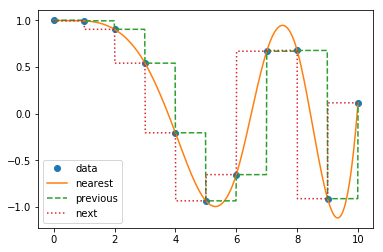

In [229]:
xnew = np.linspace(0, 10, num=1001, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
# plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

In [10]:
def spline(sample):
    data_sorted = np.array(sample)
    s = interp1d(np.arange(len(sample)), sample)

    return s

In [3]:
t = json.load(open("/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/autoencoder/data/trajectories/000006.json"))

In [ ]:
def interpolate_traj(sample, n_points):
        
    ###############
    def spline(sample):
    data_sorted = np.array(sample)
    s = interp1d(np.arange(len(sample)), sample)

    return s
    ###############

    x = sample[:,0]
    y = sample[:,1]
    s_x = spline(x)
    s_y = spline(y)
    t_new = np.linspace(0, len(sample)-1, num=n_points)
    x_new = s_x(t_new) / x_size # normalizing the data for training after.
    y_new = s_y(t_new) / y_size # normalizing the data for training after.
    new_sample = np.stack([x_new, y_new], axis=-1)
    
    return new_sample

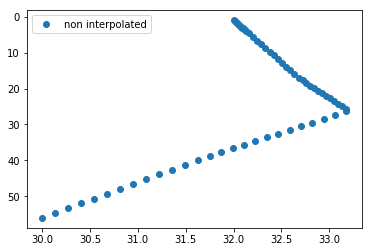

In [48]:
# Example of bad interpolation
sample = np.array([[32., 1.],[32.14082458,  4.19836321],
 [32.6878092,  17.18685072],
 [33.20182181, 26.17216046],
 [31.70606562, 39.08582429],
 [30.,56.]])


x = sample[:,0]
y = sample[:,1]
s_x = spline(x)
s_y = spline(y)

t_new = np.linspace(0, len(sample)-1, num=64)
x_new = s_x(t_new)
y_new = s_y(t_new)
new = np.stack([x_new, y_new], axis=-1)

# plt.plot(x, y, '--')
# plt.plot(x_new, y_new, '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
# plt.plot(t_new, x_new, '--o')
# plt.plot(t_new, y_new, '-')
plt.plot(new[:,0], new[:,1], 'o')
plt.gca().invert_yaxis()
plt.legend(['non interpolated', 'interpolated'], loc='best')
plt.show()

In [ ]:
# Example of bad interpolation
sample = np.array([[32., 1.],[32.14082458,  4.19836321],
 [32.6878092,  17.18685072],
 [33.20182181, 26.17216046],
 [31.70606562, 39.08582429],
 [30.,56.]])



# sample = np.array(t["36"])
s_x = spline(sample[:,0])
s_y = spline(sample[:,1])

# x = sample[:, 0]
# y = sample[:,1]
t_new = np.linspace(0, len(sample[:,0]), num=64)
x_new = s_(t_new)
y_new = s(t_new)

plt.plot(x, y, '-')
# plt.plot(x_new, y_new, '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.plot(x_new, y_new, '--o')
plt.gca().invert_yaxis()
plt.legend(['non interpolated', 'interpolated'], loc='best')
plt.show()

In [ ]:
def main(data_folder, output_folder, n_points):
    x_size = y_size = 63

    filenames = sorted(glob(os.path.join(data_folder, '*.json')))

    def interpolate_traj(sample, n_points):
        
        ###############
        def spline(sample):
            data_sorted = np.array(sorted(sample, key=lambda x: x[0]))
            # s = interp1d(data_sorted[:, 0], data_sorted[:, 1], kind="quadratic")
            try:
                s = interp1d(data_sorted[:, 0], data_sorted[:, 1], kind="quadratic")
            except:
                s = interp1d(data_sorted[:, 0], data_sorted[:, 1], kind="slinear")
                print("exc")
                
            return s
        ###############

        s = spline(sample)
        x = sample[:, 0]
        x_new = np.linspace(np.min(x), np.max(x), num=n_points)
        y_new = s(x_new)
        # normalizing the data for training after.
        x_new = x_new / x_size
        y_new = y_new / y_size
        sample_new = np.stack([y_new, x_new], axis=1) # y then x because rrtstar algo do it the other way around so we need to restore
        return sample_new

    for filename in tqdm(filenames):
        file = json.load(open(filename, 'r'))
        file_new = {}
        for k in sorted(file.keys()):
            sample = np.array(file[k])
            sample_new = interpolate_traj(sample, n_points)
            file_new[k] = sample_new.tolist()


# Extrapolation

## Colliding

In [3]:
path_traj = "/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/autoencoder/data/trajectories_obs_interpolated"
path_env = "/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/2dDeepSDF/data/random_obstacle2/BW"
filenames_traj = sorted(glob(os.path.join(path_traj, "*.json")))
trajectories_dict_all = [json.load(open(f)) for f in filenames_traj]
filenames_env = sorted(glob(os.path.join(path_env, "*.jpg")))
envs = [plt.imread(f) for f in filenames_env]

In [4]:
def plot(img_nb, traj_nb, envs=envs, trajectories_dict_all=trajectories_dict_all):
    
    img = envs[img_nb]
    trajectory = np.array(trajectories_dict_all[img_nb][str(traj_nb)]) * 63 
    print("Start: {} \nGoal:{}".format(tuple(trajectory[0]), tuple(trajectory[-1])))
    x = trajectory[:,0]
    y = trajectory[:,1]
    
    
    plt.plot(x, y)
    plt.gca().invert_yaxis()
    plt.imshow(img)
#     plt.show()
    plt.title("Extrapolated collliding trajectory")


Start: (60.01034531538275, 25.59375) 
Goal:(0.7156342155514939, 59.0625)


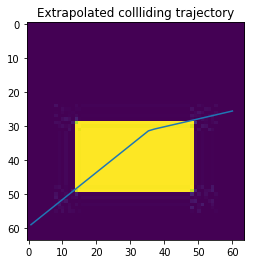

In [16]:
plot(6,8)

# Avoiding trajectories

## Non interpolated

In [24]:
path_traj = "/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/autoencoder/data/trajectories"
path_env = "/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/2dDeepSDF/data/random_obstacle/BW"
filenames_traj = sorted(glob(os.path.join(path_traj, "*.json")))
trajectories_dict_all = [json.load(open(f)) for f in filenames_traj]
filenames_env = sorted(glob(os.path.join(path_env, "*.jpg")))
envs = [plt.imread(f) for f in filenames_env]

In [25]:
def plot(img_nb, traj_nb, envs=envs, trajectories_dict_all=trajectories_dict_all):
    
    img = envs[img_nb]
    trajectory = np.array(trajectories_dict_all[img_nb][str(traj_nb)]) 
    print("Start: {} \nGoal:{}".format(tuple(trajectory[0]), tuple(trajectory[-1])))
    x = trajectory[:,0]
    y = trajectory[:,1]
    
    
    plt.plot(y, x)
    plt.gca().invert_yaxis()
    plt.imshow(img)
#     plt.show()
    plt.title("Non Interpolated avoiding trajectory")


Start: (62.0, 8.0) 
Goal:(21.0, 38.0)


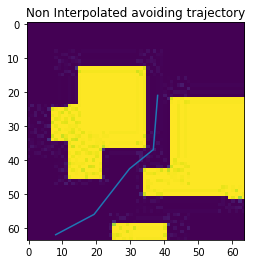

In [26]:
plot(1,3)

## Interpolated

In [82]:
path_traj = "/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/autoencoder/data/trajectories_interpolated"
path_env = "/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/2dDeepSDF/data/random_obstacle/BW"
filenames_traj = sorted(glob(os.path.join(path_traj, "*.json")))
trajectories_dict_all = [json.load(open(f)) for f in filenames_traj]
filenames_env = sorted(glob(os.path.join(path_env, "*.jpg")))
envs = [plt.imread(f) for f in filenames_env]

In [83]:
def plot(img_nb, traj_nb, envs=envs, trajectories_dict_all=trajectories_dict_all):
    
    img = envs[img_nb]
    trajectory = np.array(trajectories_dict_all[img_nb][str(traj_nb)]) * 63 
    print("Start: {} \nGoal:{}".format(tuple(trajectory[0]), tuple(trajectory[-1])))
    x = trajectory[:,0]
    y = trajectory[:,1]
    
    
    plt.plot(x, y)
    plt.gca().invert_yaxis()
    plt.imshow(img)
#     plt.show()
    plt.title("Interpolated avoiding trajectory")
    plt.draw()


Start: (15.75, 53.15625) 
Goal:(49.21875, 6.890625)


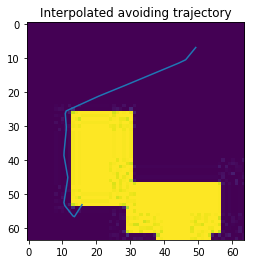

In [84]:
plot(51,99)

# Reconstruction

In [2]:
import numpy as np
import os
import json
from glob import glob
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import utils.workspace as ws
from autoencoder.autoencoder import AutoEncoder


In [3]:
# experiment_directory = "../autoencoder_first/autoencoder"
# checkpoint = "750"
# # def init():
# use_cuda = torch.cuda.is_available()
# if use_cuda:
#     device = torch.device("cuda")
#     print("Using GPU")
# else:
#     device = torch.device("cpu")
#     print("Using CPU")

# specs = ws.load_experiment_specifications(experiment_directory)

# layer_sizes = specs["LayerSizes"]
# nl_type = specs["NonLinearityType"]
# is_constrained = specs["Constrained"]
# dropout = specs["Dropout"]
# skip_last_layer_nl = specs["SkipLastLayerActivation"]
# model = AutoEncoder(layer_sizes=[input_dim] + [int(l) for l in layer_sizes],
#                     nl_type=nl_type,
#                     is_constrained=is_constrained,
#                     dp_drop_prob=dropout,
#                     last_layer_activations=not skip_last_layer_nl).to(device).float()


# path_to_model_dir = os.path.join(experiment_directory, ws.model_params_dir)
# print("Loading checkpoint {} model from: {}".format(
#     checkpoint, os.path.abspath(path_to_model_dir)))
# model.load_model_parameters(path_to_model_dir, checkpoint)
# model.to(device)
# model.eval()

In [4]:
experiment_directory = "autoencoder"
checkpoint = "700"
# def init():
use_cuda = torch.cuda.is_available()
if use_cuda:
    device = torch.device("cuda")
    print("Using GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

specs = ws.load_experiment_specifications(experiment_directory)

latent_dim = specs["LatentDim"]
input_dim = specs["InputDim"]
dropout = specs["Dropout"]
model = AutoEncoder(input_dim, latent_dim, dropout).to(device).float()


path_to_model_dir = os.path.join(experiment_directory, ws.model_params_dir)
print("Loading checkpoint {} model from: {}".format(
    checkpoint, os.path.abspath(path_to_model_dir)))
model.load_model_parameters(path_to_model_dir, checkpoint)
model.to(device)
model.eval()

Using GPU
Loading checkpoint 700 model from: /home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/autoencoder/autoencoder/ModelParameters


AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=128, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): BatchNorm1d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Linear(in_features=512, out_features=256, bias=True)
    (6): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Linear(in_features=256, out_features=64, bias=True)
    (12): Sigmoid()
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Lin

In [9]:
path_pred = "/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/autoencoder/autoencoder/Codes/real"
path_true = "/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/autoencoder/data/trajectories_interpolated"
filenames_pred = sorted(glob(os.path.join(path_pred, "*.npy")))
codes = [np.load(f) for f in filenames_pred]
filenames_true = sorted(glob(os.path.join(path_true, "*.json")))
trajectories_true = [json.load(open(f)) for f in filenames_true]


In [10]:
def compare(img_nb, traj_nb, codes=codes, trajectories_true=trajectories_true):
    
    codes = codes[img_nb]
    reconstructed_trajectories = model.decode(torch.from_numpy(codes).to(device))
    reconstructed_trajectories = reconstructed_trajectories.view(reconstructed_trajectories.size(0), -1, 2).detach().cpu().numpy()
    
    traj_true = np.array(trajectories_true[img_nb][str(traj_nb)])*63
    traj_pred = np.array(reconstructed_trajectories[traj_nb])*63
    
    plt.plot(traj_true[:,0], traj_true[:,1], "o")
    plt.plot(traj_pred[:,0],traj_pred[:,1], "-")
    plt.gca().invert_yaxis()
    plt.legend(["True trajectory", "Reconstructed trajectory"])


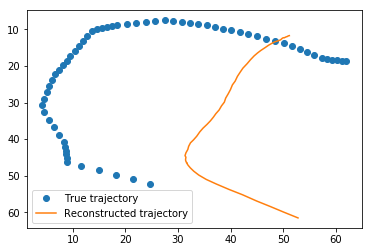

In [21]:
compare(1,4)

In [13]:
a = np.load("/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/discriminator/data/fake/000000.npy")

In [20]:
b = np.load("/home/user/Documents/Alassane/motionPlanning/2d/2d_trajectory_generator/2dDeepSDF/chomp256/Reconstructions/fake/000000.npy")

In [21]:
b.shape

(50, 289)

In [18]:
a[0][0]

-0.07999199628829956

In [19]:
b[0][0]

0.1234588772058487